# Supplemental Figure 14 — Uncorrected temporal mutation enrichment across the AraC-LOV R2 P1.2 sequence during POGO-PANCE evolution.


Unless explicitly noted otherwise (e.g. indicated as being from Zenodo), all data used for the visualisations was generated using the Illumina or Nanopore pipeline.

---

### Figure Summary

<div style="text-indent:-2em; padding-left:2em"><strong>(A)</strong> Uncorrected temporal mutation enrichment across the AraC-LOV R2 P1.2
sequence during POGO-PANCE evolution. </div>  

## Notebook Setup
----------------------------

Run the following cell to import all required libraries, define plotting settings, and configure the environment for data analysis and visualization.

In [1]:
# --- Import necessary modules ---
import os
import sys
import json
import pickle as pkl
from importlib import reload
from pathlib import Path

notebook_dir = Path().resolve()
repo_root = notebook_dir.parent 
sys.path.append(str(repo_root))

import numpy as np
import pandas as pd
from scipy import stats
import scipy
from Bio import SeqIO
import csv
from collections import Counter
from Bio.SeqIO import QualityIO
from scripts.utils import dna_rev_comp, translate_dna2aa
from scripts.preprocessing_functions import *
from scripts.plotting import *
import matplotlib.colorbar as mcolorbar 
from scripts.Nanopore_functions import *
from scripts.Illumina_functions import *
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib as mpl
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap
from scripts.linker_analysis_functions  import *


# ======================== PLOTTING SETTINGS ========================

# --- Custom color map for mutation visualization ---
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", [
    "#22577A",  # Deep blue
    "#38A3A5",  # Teal
    "#57CC99",  # Medium green
    "#80ED99",  # Bright green
    "#C7F9CC"   # Light pastel green
], N=256)

# --- Seaborn theme configuration ---
custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.linewidth": 1
}
sns.set_theme(context="paper", style='ticks', palette="Greys_r", rc=custom_params)

# --- General matplotlib settings ---
fs = 8  # font size
plt.rcParams['svg.fonttype'] = 'none'
mpl.rcParams.update({
    'font.family': 'Avenir Next',
    'font.weight': 'demi', 
    'font.size': fs,
    'text.color': '#231F20',
    'axes.labelcolor': '#231F20',
    'xtick.color': '#231F20',
    'ytick.color': '#231F20',
    'axes.edgecolor': '#231F20',
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'pdf.fonttype': 42,
    'text.usetex': False
})
sns.set_context("paper", rc={
    "font.size": fs,
    "axes.titlesize": fs + 1,
    "axes.labelsize": fs,
    "axes.linewidth": 1,
    "xtick.labelsize": fs,
    "ytick.labelsize": fs,
    "legend.fontsize": fs,
    "legend.title_fontsize": fs + 1
})

# ======================== LAYOUT PARAMETERS ========================

# --- Pre-defined figure dimensions for multi-panel plots ---
hi = 10.5 * 0.75
wi3 = 2.24
wi2 = 4.76
wi1 = 7.24
nr = 5

# --- Utility for shortening sample names ---
short_fn = np.vectorize(lambda x: x[:5])

## Figure S14A: Uncorrected temporal mutation enrichment across the AraC-LOV R2 P1.2 sequence during POGO-PANCE evolution.
----------------------------

Nanopore-based tracking of mutation frequencies
across the R2-LOV sequence over three complete cycles of mutagenesis, negative selection, and
positive selection. Data correspond to the temporal enrichment analysis presented in Fig. 3C.
Mutation frequencies are shown for each cycle by amino acid position, with residues exceeding
`0.25` mutation frequency shaded in <span style="color: yellow"><b>yellow</b></span>. To reduce noise and correct for systematic
sequencing artifacts, background mutation rates observed during the first mutagenesis cycle,
assumed to reflect random mutagenesis plus persistent technical noise, were subtracted from all
data sets in Fig. 3C.

The data underlying this visualization was generated from preprocessed reads. Initial processing steps—including quality filtering, alignment, and correction of frame-disrupting indels introduced by Nanopore sequencing errors—were carried out using the scripts `01_Nanopore_read_filtering.py`, `02_Nanopore_alignment.py`, `03_Nanopore_quality_control.py` and `04_Nanopore_process_reads.py`. Alternatively, the complete workflow mentioned above can be executed via the shell script `00_Nanopore_filtering_alignment_processing.sh`, which sequentially integrates all these steps. Next, mutation enrichment was calculated as demonstrated in `1_Nanopore_DMS_analysis.ipynb`.

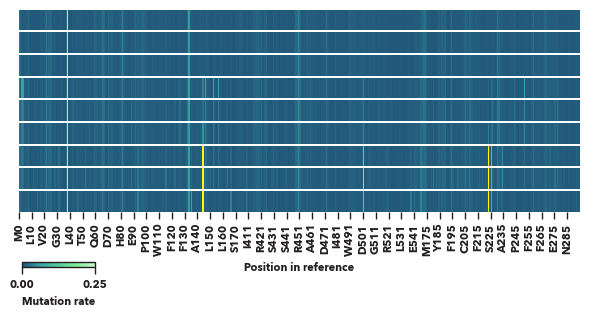

In [ ]:
annots_R2 = ['M0', 'S1', 'A2', 'K3', 'A4', 'Q5', 'N6', 'D7', 'P8', 'L9', 'L10', 'P11', 'G12', 'Y13', 'S14', 'F15', 'N16', 'A17', 'H18', 'L19', 'V20', 'A21', 'G22', 'L23', 'T24', 'P25', 'I26', 'E27', 'A28', 'N29', 'G30', 'Y31', 'L32', 'D33', 'F34', 'F35', 'I36', 'D37', 'R38', 'P39', 'L40', 'G41', 'M42', 'K43', 'G44', 'Y45', 'I46', 'L47', 'N48', 'L49', 'T50', 'I51', 'R52', 'G53', 'Q54', 'G55', 'V56', 'V57', 'K58', 'N59', 'Q60', 'G61', 'R62', 'E63', 'F64', 'V65', 'C66', 'R67', 'P68', 'G69', 'D70', 'I71', 'L72', 'L73', 'F74', 'P75', 'P76', 'G77', 'E78', 'I79', 'H80', 'H81', 'Y82', 'G83', 'R84', 'H85', 'P86', 'E87', 'A88', 'R89', 'E90', 'W91', 'Y92', 'H93', 'Q94', 'W95', 'V96', 'Y97', 'F98', 'R99', 'P100', 'R101', 'A102', 'Y103', 'W104', 'H105', 'E106', 'W107', 'L108', 'N109', 'W110', 'P111', 'S112', 'I113', 'F114', 'A115', 'N116', 'T117', 'G118', 'F119', 'F120', 'R121', 'P122', 'D123', 'E124', 'A125', 'H126', 'Q127', 'P128', 'H129', 'F130', 'S131', 'D132', 'L133', 'F134', 'G135', 'Q136', 'I137', 'I138', 'N139', 'A140', 'G141', 'Q142', 'G143', 'E144', 'G145', 'L146', 'Y147', 'S148', 'E149', 'L150', 'L151', 'T152', 'I153', 'N154', 'L155', 'L156', 'E157', 'Q158', 'L159', 'L160', 'L161', 'R162', 'R163', 'M164', 'E165', 'A166', 'I167', 'N168', 'E169', 'S170', 'S1', 'G2', 'L404', 'A405', 'T406', 'T407', 'L408', 'E409', 'R410', 'I411', 'E412', 'K413', 'N414', 'F415', 'V416', 'I417', 'T418', 'D419', 'P420', 'R421', 'L422', 'P423', 'D424', 'N425', 'P426', 'I427', 'I428', 'F429', 'A430', 'S431', 'D432', 'S433', 'F434', 'L435', 'Q436', 'L437', 'T438', 'E439', 'Y440', 'S441', 'R442', 'E443', 'E444', 'I445', 'L446', 'G447', 'R448', 'N449', 'C450', 'R451', 'F452', 'L453', 'Q454', 'G455', 'P456', 'E457', 'T458', 'D459', 'R460', 'A461', 'T462', 'V463', 'R464', 'K465', 'I466', 'R467', 'D468', 'A469', 'I470', 'D471', 'N472', 'Q473', 'T474', 'E475', 'V476', 'T477', 'V478', 'Q479', 'L480', 'I481', 'N482', 'Y483', 'T484', 'K485', 'S486', 'G487', 'K488', 'K489', 'F490', 'W491', 'N492', 'L493', 'F494', 'H495', 'L496', 'Q497', 'P498', 'M499', 'R500', 'D501', 'Q502', 'K503', 'G504', 'D505', 'V506', 'Q507', 'Y508', 'F509', 'I510', 'G511', 'V512', 'Q513', 'L514', 'D515', 'G516', 'T517', 'E518', 'H519', 'V520', 'R521', 'D522', 'A523', 'A524', 'E525', 'R526', 'E527', 'G528', 'V529', 'M530', 'L531', 'I532', 'K533', 'K534', 'T535', 'A536', 'E537', 'N538', 'I539', 'D540', 'E541', 'A542', 'A543', 'K544', 'G3', 'S4', 'L171', 'H172', 'P173', 'P174', 'M175', 'D176', 'N177', 'R178', 'V179', 'R180', 'E181', 'A182', 'C183', 'Q184', 'Y185', 'I186', 'S187', 'D188', 'H189', 'L190', 'A191', 'D192', 'S193', 'N194', 'F195', 'D196', 'I197', 'A198', 'S199', 'V200', 'A201', 'Q202', 'H203', 'V204', 'C205', 'L206', 'S207', 'P208', 'S209', 'R210', 'L211', 'S212', 'H213', 'L214', 'F215', 'R216', 'Q217', 'Q218', 'L219', 'G220', 'I221', 'S222', 'V223', 'L224', 'S225', 'W226', 'R227', 'E228', 'D229', 'Q230', 'R231', 'I232', 'S233', 'Q234', 'A235', 'K236', 'L237', 'L238', 'L239', 'S240', 'T241', 'T242', 'R243', 'M244', 'P245', 'I246', 'A247', 'T248', 'V249', 'G250', 'L251', 'N252', 'V253', 'G254', 'F255', 'D256', 'D257', 'Q258', 'L259', 'Y260', 'F261', 'S262', 'R263', 'V264', 'F265', 'K266', 'K267', 'C268', 'T269', 'G270', 'A271', 'S272', 'P273', 'S274', 'E275', 'F276', 'R277', 'A278', 'G279', 'C280', 'E281', 'E282', 'K283', 'V284', 'N285', 'D286', 'V287', 'A288', 'V289', 'K290', 'L291', 'S292', 'G293','*294']
barcodes = ['R2_P1-2_Cycle-1_P-1', 'R2_P1-2_Cycle-1_P-2', 'R2_P1-2_Cycle-1_P-3', 'R2_P1-2_Cycle-2_P-1', 'R2_P1-2_Cycle-2_P-2', 'R2_P1-2_Cycle-2_P-3', 'R2_P1-2_Cycle-3_P-1', 'R2_P1-2_Cycle-3_P-2', 'R2_P1-2_Cycle-3_P-3']
enrichments = {}
quality = 20
data_type = 'AA'
data_folder = "Nanopore/Nanopore_P0115"

annots = annots_R2
total_enrichments = pd.DataFrame(index = barcodes, columns = annots)

# --- Load enrichment data and compute total enrichment per barcode ---
for barcode in barcodes:
    araclov2_enr = pd.read_csv(f"{repo_root}/final_output/{data_folder}/{barcode}/highly_accurate_basecalling/filtered_Q{quality}_maxminlen/enrichment_relative_roi_{data_type}.csv", index_col = 0)
    total_enrichment = araclov2_enr.iloc[:-1,:].sum()
    total_enrichments.loc[barcode] = total_enrichment
    enrichments[barcode] = araclov2_enr

# --- Identify top 5% most variable positions ---
vars = total_enrichments.var()
quantile_threshold = np.percentile(vars, 95)
top_indices = [i for i, var in enumerate(vars) if var >= quantile_threshold]
annots_top_var = [annots[i] for i in top_indices]


# --- Create subplot layout for heatmaps ---
fig, axes = plt.subplots(9, figsize = (wi1,hi/3))
fig.subplots_adjust(hspace=0.1)

for idx, barcode in enumerate(barcodes): 

    plot_df = enrichments[barcode].copy()
    plot_df = pd.DataFrame(plot_df.iloc[:-1,:].sum()).T
    my_cmap = plt.get_cmap(custom_cmap).copy()
    my_cmap.set_over('yellow')
    annotations = annots_R2 

    sns.heatmap(plot_df, xticklabels=annotations if idx  ==8 else False, ax = axes[idx], cmap = my_cmap, vmax=0.25, cbar = False, yticklabels=False, cbar_kws={"pad" : 0.02} )

    if idx == 8: 
        axes[idx].set_xlabel("Position in reference")
        axes[idx].set_xticks(list(range(0, len(annotations), 10)))
        axes[idx].set_xticklabels(annotations[::10])

cbar_ax = fig.add_axes([0.13, -0.1, 0.1, 0.02])
cbar = fig.colorbar(axes[0].collections[0], cax=cbar_ax, orientation = "horizontal")
cbar.set_label("Mutation rate")
cbar.set_ticks([0.0, 0.25])

# plt.savefig(f"final_output/{data_folder}/POGO_temporal_data_complete_region_bc01substr.pdf", bbox_inches = "tight", dpi = 600)
# plt.savefig(f"final_output/{data_folder}/POGO_temporal_data_complete_region_bc01substr.png", bbox_inches = "tight", dpi = 600)

plt.show()